# Logistic Model of Cumulative and recovered

Basic Logistic model for Indonesia Covid 
(data until 20200425) using PSO optimization with parameter a,b,c,d and e. The prediction is about cumulative data and cumulative recovered (with assumption death rate is 8.5%)

![logit](../images/Logistic-model.png)

In [1]:
PATH_DATA = '../data/raw/'
PATH_DATA_INTERIM = '../data/interim/'
PATH_SRC='../src/'
PATH_IMG='../images/'

In [2]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [3]:
import pandas as pd
import scipy.integrate as spi
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt
import pyswarms as ps
import sys

sys.path.insert(1, PATH_SRC)
from covid_model import sird_model, pso_logistic, logistic_model

In [4]:
## Assumption
CURR_DATE='20200425'

## Get The Data

Getting the data and do the summary

In [5]:
col_use=['Sus','Inf','Rec','Dea']
col_use_pred=[x+'_pred' for x in col_use]

In [6]:
## Get The Raw Data
df_daily0=pd.read_csv(PATH_DATA+'20200404_DailyCase_ID.csv')
df_daily1=pd.read_csv(PATH_DATA+'20200412_DailyCase_ID.csv')
df_daily2=pd.read_csv(PATH_DATA+CURR_DATE+'_DailyCase_ID.csv')

df_daily=pd.concat([df_daily0,df_daily1,df_daily2]).drop_duplicates()
df_daily=df_daily.reset_index()
del df_daily['index']

df_daily=df_daily.fillna(0)
df_daily['Cumulative']=df_daily['Kasus (Kumulatif)']
df_daily['Rec_Cumulative']=df_daily['Sembuh (baru)'].cumsum()

In [7]:
df_daily.tail(15)

,DT,Kasus (Kumulatif),Kasus Baru,Sembuh (baru),Meninggal (baru),Cumulative,Rec_Cumulative
39,2020-04-10 00:00:00,3512,219.0,30.0,26.0,3512,282.0
40,2020-04-11 00:00:00,3842,330.0,4.0,21.0,3842,286.0
41,2020-04-12 00:00:00,4241,399.0,73.0,46.0,4241,359.0
42,2020-04-13 00:00:00,4557,316.0,21.0,26.0,4557,380.0
43,2020-04-14 00:00:00,4839,282.0,46.0,60.0,4839,426.0
44,2020-04-15 00:00:00,5136,297.0,20.0,10.0,5136,446.0
45,2020-04-16 00:00:00,5516,380.0,102.0,27.0,5516,548.0
46,2020-04-17 00:00:00,5923,407.0,59.0,24.0,5923,607.0
47,2020-04-18 00:00:00,6248,325.0,24.0,15.0,6248,631.0
48,2020-04-19 00:00:00,6575,327.0,55.0,47.0,6575,686.0


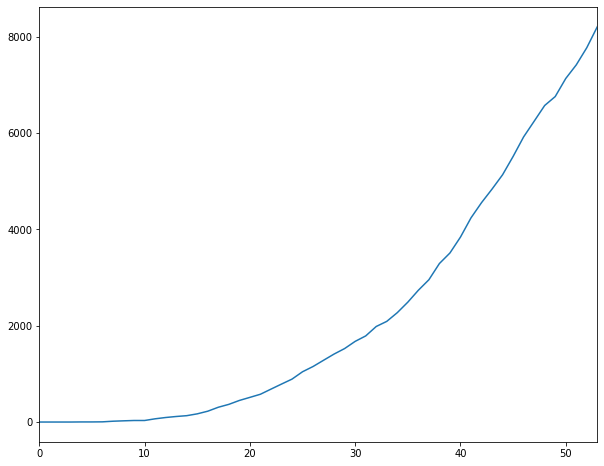

In [8]:
df_daily['Cumulative'].plot(figsize=(10,8))

## Tuning The Parameter Logistic of All Cases

The newest data is more influence the model than the last one.. (using weight)

In [9]:
# param_a,param_b,param_c,param_d,param_e

In [18]:
## Summary Cummulative Cases
## First 20 day --> [48471.4817, 40.7540622, 101.711472, 0.307469945, 5.41640784]  (8.4040045827)
## First 27 day --> [108172.109, 45.9734812, 109.122463, 0.215903572, 4.77786082] (23.04402988374216)
## First 34 day --> [136977.94, 45.1986732, 100.543712, 0.183285129, 4.4660551] (53.12156689)
## First 42 day --> [640543.324, 35.1579225, 106.64473, 0.102669223, 4.31130506]
## First 53 day--> [665812.1, 55.5254534, 101.07603, 0.113157825, 4.65867754] (2.4356155)


### Training with All Data Cumulative cases

In [11]:
## all current data
df_daily0=df_daily[['Cumulative']].copy()
prt=int(len(df_daily0)/4)+1
weight_ls=[2.5]*prt+[1.5]*prt+[0.5]*prt+[0.1]*prt
weight_ls2=weight_ls[:len(df_daily0)]
weight_ls2.sort()
df_daily0['weight']=weight_ls2

In [12]:
df_daily0.tail()

,Cumulative,weight
49,6760,2.5
50,7135,2.5
51,7418,2.5
52,7775,2.5
53,8211,2.5


In [13]:
# x=[40,3,0.8,0.9,0.1]
# logistic_model(x,[0,1,2])
# cost_func_logistic(x,df_daily0,with_pred=True)

In [14]:
max_b=[750000, 60, 120, 0.3, 6.5]
min_b=[600000, 30, 98, 0.001, 4]
all_param,cost_value=pso_logistic(df0=df_daily0, 
                                  max_bound=max_b,
                                  min_bound=min_b,
                                  factor=0.005)

2020-04-25 05:24:47,924 - pyswarms.single.global_best - INFO - Optimize for 40 iters with {'c1': 0.15, 'c2': 0.95, 'w': 0.25}
pyswarms.single.global_best: 100%|██████████|40/40, best_cost=2.58
2020-04-25 05:25:05,777 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.5777209423762555, best pos: [6.74164625e+05 5.43599632e+01 1.16630567e+02 1.10025514e-01
 4.41953840e+00]
2020-04-25 05:25:05,788 - pyswarms.single.global_best - INFO - Optimize for 40 iters with {'c1': 0.15, 'c2': 0.95, 'w': 0.25}
pyswarms.single.global_best: 100%|██████████|40/40, best_cost=2.94
2020-04-25 05:25:25,057 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.9426834386234866, best pos: [6.12611834e+05 5.38956483e+01 1.02356261e+02 1.19069528e-01
 4.77223299e+00]
2020-04-25 05:25:25,067 - pyswarms.single.global_best - INFO - Optimize for 40 iters with {'c1': 0.15, 'c2': 0.95, 'w': 0.25}
pyswarms.single.global_best: 100%|██████████|40/40, best_cost=5.7 
2020-04-2

In [15]:
for i in all_param:
    print(i)
print('.. :',cost_value)

665812.0997534989
55.52545344352267
101.07602987640489
0.11315782511326934
4.658677543343263
.. : 2.435615565900367


In [19]:
# all_param = [640543.324, 35.1579225, 106.64473, 0.102669223, 4.31130506] #--> old
all_param = [665812.1, 55.5254534, 101.07603, 0.113157825, 4.65867754]
all_param

[665812.1, 55.5254534, 101.07603, 0.113157825, 4.65867754]

In [20]:
## Predict
T_start = 0.0
T_inc=1.0
# T_end = 23+4
T_end = 30*7

T_range = np.arange(T_start, T_end+T_inc, T_inc)
RES = logistic_model(all_param,T_range)
df_sird_pred=pd.DataFrame(RES,columns=['Cumulative_pred'])

In [21]:
date_1 = dt.datetime.strptime("2020-03-02", "%Y-%m-%d")
all_date=[date_1 + dt.timedelta(days=int(i)) for i in range(T_end+1)]

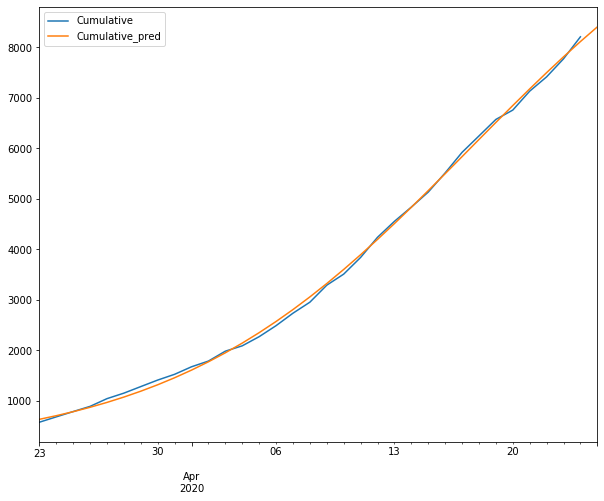

In [22]:
data_check_all_cases=pd.concat([df_daily0[['Cumulative']],df_sird_pred[['Cumulative_pred']]],axis=1)
data_check_all_cases.index=all_date
data_check_all_cases[21:55].plot(figsize=(10,8))

In [23]:
# ## Old
# data_check_all_cases=pd.concat([df_daily0[['Cumulative']],df_sird_pred[['Cumulative_pred']]],axis=1)
# data_check_all_cases.index=all_date
# ax=data_check_all_cases[34:55].plot(figsize=(10,8),title='True Prediction Range\n(Suspected Prediction)')
# xposition = [pd.to_datetime('2020-04-12'), pd.to_datetime('2020-04-14')]
# for xc in xposition:
#     ax.axvline(x=xc, color='r', linestyle='--')

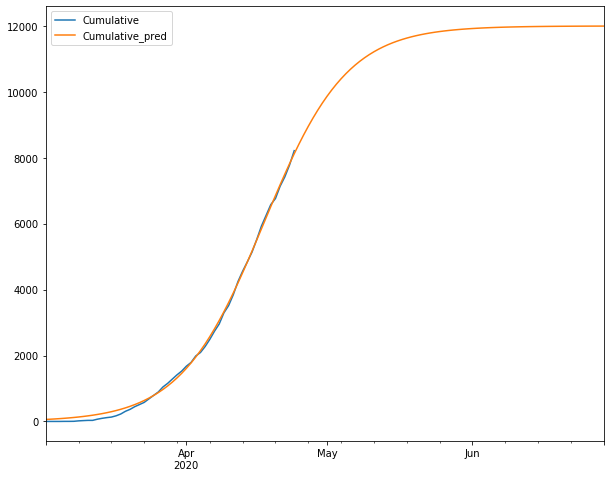

In [24]:
data_check_all_cases[:120].plot(figsize=(10,8))

In [25]:
data_check_all_cases.max()

Cumulative          8211.000000
Cumulative_pred    11991.114941
dtype: float64

In [26]:
data_check_all_cases[45:60]

,Cumulative,Cumulative_pred
2020-04-16,5516.0,5500.236246
2020-04-17,5923.0,5838.362880
2020-04-18,6248.0,6177.493096
2020-04-19,6575.0,6515.462046
2020-04-20,6760.0,6850.134375
2020-04-21,7135.0,7179.457634
2020-04-22,7418.0,7501.511312
2020-04-23,7775.0,7814.549073
2020-04-24,8211.0,8117.032386
2020-04-25,NaN,8407.654416


### Training with All Data Recovered

with total death rate is 8.5%

In [27]:
# 34 --> [ 0.98518133,  1.06919954, 28.79657901,  0.14964926,  4.40898579]
# 42 --> [0.98026423, 1.0691996, 39.70484, 0.113262, 4.786129]
# 53 --> [ 0.89474875,  1.06546736, 38.18543954,  0.09902955,  3.70800671] (1920.56797)

In [28]:
## all current data
df_daily0=df_daily[['Rec_Cumulative']].copy()
df_daily0['Cumulative']=df_daily0['Rec_Cumulative']
df_daily0=df_daily0/(data_check_all_cases.max()['Cumulative_pred']*(1-0.085))

prt=int(len(df_daily0)/4)+1
weight_ls=[2]*prt+[1]*prt+[0.8]*prt+[0.1]*prt
weight_ls2=weight_ls[:len(df_daily0)]
weight_ls2.sort()
df_daily0['weight']=weight_ls2

In [29]:
df_daily0.tail()

,Rec_Cumulative,Cumulative,weight
49,0.068083,0.068083,2.0
50,0.076742,0.076742,2.0
51,0.083213,0.083213,2.0
52,0.087496,0.087496,2.0
53,0.091324,0.091324,2.0


In [30]:
# x=[40,3,0.8,0.9,0.1]
# logistic_model(x,[0,1,2])
# cost_func_logistic(x,df_daily0,with_pred=True)

In [31]:
min_b=[0.97, 0.97, 32, 0.01, 3]
max_b=[0.99, 0.99, 45, 0.2, 6]

all_param,cost_value=pso_logistic(df0=df_daily0, max_bound=max_b, min_bound=min_b, factor=5000000000)

2020-04-25 05:30:23,994 - pyswarms.single.global_best - INFO - Optimize for 40 iters with {'c1': 0.15, 'c2': 0.95, 'w': 0.25}
pyswarms.single.global_best: 100%|██████████|40/40, best_cost=2e+3  
2020-04-25 05:30:42,621 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1996.7409863045496, best pos: [ 0.97256971  0.97913524 40.85027114  0.09775663  3.67620856]
2020-04-25 05:30:42,631 - pyswarms.single.global_best - INFO - Optimize for 40 iters with {'c1': 0.15, 'c2': 0.95, 'w': 0.25}
pyswarms.single.global_best: 100%|██████████|40/40, best_cost=1.99e+3
2020-04-25 05:31:01,414 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1993.5371177102206, best pos: [ 0.97254488  0.98654391 37.8636108   0.09788267  3.7576052 ]
2020-04-25 05:31:01,423 - pyswarms.single.global_best - INFO - Optimize for 40 iters with {'c1': 0.15, 'c2': 0.95, 'w': 0.25}
pyswarms.single.global_best: 100%|██████████|40/40, best_cost=2e+3  
2020-04-25 05:31:19,382 - pyswarms

In [32]:
# all_param,cost_value
for i in all_param:
    print(i)
print('.. :',cost_value)

0.8947487509078861
1.0654673581243348
38.185439537106035
0.0990295526813014
3.708006711449317
.. : 1920.5679777847088


In [33]:
# all_param = [ 0.89474875,  1.06546736, 38.18543954,  0.09902955,  3.70800671]
all_param

array([ 0.89474875,  1.06546736, 38.18543954,  0.09902955,  3.70800671])

In [34]:
## Predict
T_start = 0.0
T_inc=1.0
# T_end = 23+4
T_end = 30*10

T_range = np.arange(T_start, T_end+T_inc, T_inc)
RES = logistic_model(all_param,T_range)
df_sird_pred=pd.DataFrame(RES,columns=['Cumulative_pred'])

In [35]:
date_1 = dt.datetime.strptime("2020-03-02", "%Y-%m-%d")
all_date=[date_1 + dt.timedelta(days=int(i)) for i in range(T_end+1)]

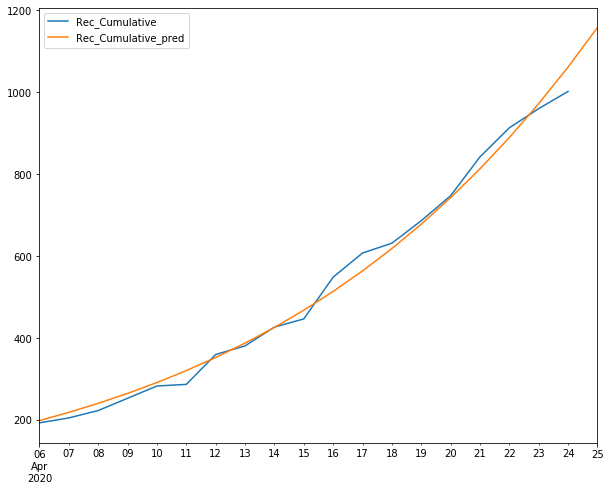

In [36]:
data_check_rec=pd.concat([df_daily0[['Rec_Cumulative']],df_sird_pred[['Cumulative_pred']]],axis=1)
data_check_rec.columns=['Rec_Cumulative','Rec_Cumulative_pred']
data_check_rec=data_check_rec*(data_check_all_cases.max()['Cumulative_pred']*(1-0.085))
data_check_rec.index=all_date
data_check_rec[35:55].plot(figsize=(10,8))

In [37]:
# data_check_rec=pd.concat([df_daily0[['Rec_Cumulative']],df_sird_pred[['Cumulative_pred']]],axis=1)
# data_check_rec.columns=['Rec_Cumulative','Rec_Cumulative_pred']
# data_check_rec=data_check_rec*(data_check_all_cases.max()['Cumulative_pred']*(1-0.085))
# data_check_rec.index=all_date
# ax=data_check_rec[35:55].plot(figsize=(10,8),title='True Prediction Range \n (Recover Prediction)')

# xposition = [pd.to_datetime('2020-04-12'), pd.to_datetime('2020-04-18')]
# for xc in xposition:
#     ax.axvline(x=xc, color='r', linestyle='--')

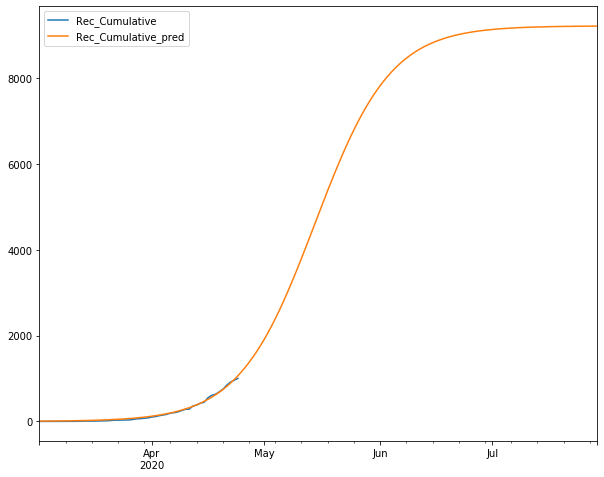

In [38]:
data_check_rec[:150].plot(figsize=(10,8))

In [39]:
data_check_rec['Rec_Cumulative_pred_before']=data_check_rec['Rec_Cumulative_pred'].shift(1)
data_check_rec['Rec_Cumulative_before']=data_check_rec['Rec_Cumulative'].shift(1)

data_check_rec['Prediksi Sembuh Harian']=data_check_rec['Rec_Cumulative_pred']-data_check_rec['Rec_Cumulative_pred_before']
data_check_rec['Real Sembuh Harian']=data_check_rec['Rec_Cumulative']-data_check_rec['Rec_Cumulative_before']

In [40]:
data_check_rec[['Real Sembuh Harian','Prediksi Sembuh Harian']][45:65]

,Real Sembuh Harian,Prediksi Sembuh Harian
2020-04-16,102.0,45.923325
2020-04-17,59.0,50.146982
2020-04-18,24.0,54.700036
2020-04-19,55.0,59.596293
2020-04-20,61.0,64.847608
2020-04-21,95.0,70.463259
2020-04-22,71.0,76.449228
2020-04-23,47.0,82.807412
2020-04-24,42.0,89.534765
2020-04-25,NaN,96.622388


## Merge result

In [41]:
df_merge_pred=pd.concat([data_check_rec[['Rec_Cumulative_pred']],data_check_all_cases[['Cumulative_pred']]],axis=1)

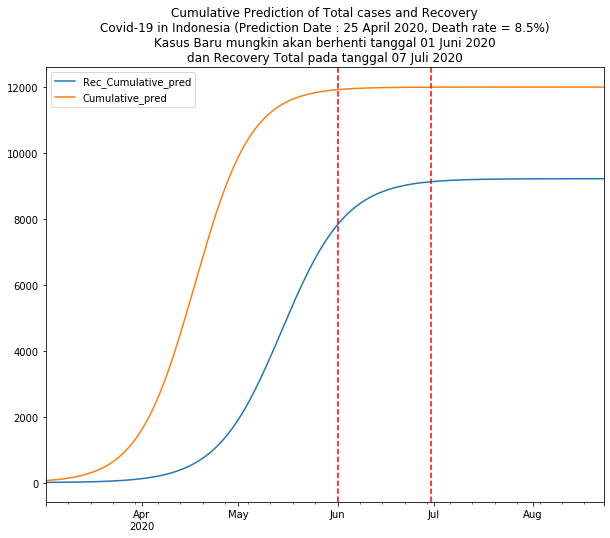

In [45]:
tx1='Cumulative Prediction of Total cases and Recovery\nCovid-19 in Indonesia (Prediction Date : 25 April 2020, Death rate = 8.5%)'
tx1+='\nKasus Baru mungkin akan berhenti tanggal 01 Juni 2020'
tx1+='\ndan Recovery Total pada tanggal 07 Juli 2020'

ax=df_merge_pred[:175].plot(figsize=(10,8),title=tx1)
xposition = [pd.to_datetime('2020-06-01'), pd.to_datetime('2020-06-30')]
for xc in xposition:
    ax.axvline(x=xc, color='r', linestyle='--')

In [46]:
# tx1='Cumulative Prediction of Total cases and Recovery\nCovid-19 in Indonesia (Prediction Date : 4 April 2020, Death rate = 8.5%)'
# tx1+='\nKasus Baru mungkin akan berhenti tanggal 10 Juni 2020'
# tx1+='\ndan Recovery Total pada tanggal 30 Juni 2020'

# ax=df_merge_pred[:180].plot(figsize=(10,8),title=tx1)
# xposition = [pd.to_datetime('2020-06-10'), pd.to_datetime('2020-06-30')]
# for xc in xposition:
#     ax.axvline(x=xc, color='r', linestyle='--')

In [47]:
df_merge_pred2=pd.concat([data_check_rec[['Real Sembuh Harian','Prediksi Sembuh Harian']],data_check_all_cases[['Cumulative','Cumulative_pred']]],axis=1)

In [50]:
df_merge_pred2[45:65]

,Real Sembuh Harian,Prediksi Sembuh Harian,Cumulative,Cumulative_pred
2020-04-16,102.0,45.923325,5516.0,5500.236246
2020-04-17,59.0,50.146982,5923.0,5838.362880
2020-04-18,24.0,54.700036,6248.0,6177.493096
2020-04-19,55.0,59.596293,6575.0,6515.462046
2020-04-20,61.0,64.847608,6760.0,6850.134375
2020-04-21,95.0,70.463259,7135.0,7179.457634
2020-04-22,71.0,76.449228,7418.0,7501.511312
2020-04-23,47.0,82.807412,7775.0,7814.549073
2020-04-24,42.0,89.534765,8211.0,8117.032386
2020-04-25,NaN,96.622388,NaN,8407.654416


## Conclusion

...